# Assignment 2 - Statistical Treatment fot Retail Datasets

## Tentang Data
This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

## Isi Data
1. BOROUGH : kode digit yang menyatakan wilayah dari lokasi properti

Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5)

2. BLOCK and LOT: A Tax Block is a sub-division of the borough on which real properties are located. The Department of Finance uses a Borough-Block-Lot classification to label all real property in the City. “Whereas” addresses describe the street location of a property, the block and lot distinguishes one unit of real property from another, such as the different condominiums in a single building. Also, block and lots are not subject to name changes based on which side of the parcel the building puts its entrance on. A Tax Lot is a subdivision of a Tax Block and represents the property unique location. Because there are more than 11k unique blocks in the dataset, it doesn't make sense to define it as a categorical variable! Will leave it as numerical. The same story for LOT

3. NEIGHBORHOOD: Department of Finance assessors determine the neighborhood name in the course of valuing properties. The common name of the neighborhood is generally the same as the name Finance designates. However, there may be slight differences in neighborhood boundary lines and some sub-neighborhoods may not be included. This variable should be categorical.

4. BUILDING CLASS CATEGORY: This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class Category, Block and Lot. This variable should be categorical.

5. TAX CLASS AT PRESENT Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property. This variable should be categorical.

6. BUILDING CLASS AT PRESENT: The Building Classification is used to describe a property’s constructive use. The first position of the Building Class is a letter that is used to describe a general class of properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies condominiums). The second position, a number, adds more specific information about the property’s use or construction style (using our previous examples “A0” is a Cape Cod style one family home, “O4” is a tower type office building and “R5” is a commercial condominium unit). The term Building Class used by the Department of Finance is interchangeable with the term Building Code used by the Department of Buildings. This variable should be categorical.

7. ADDRESS: The street address of the property as listed on the Sales File. Coop sales include the apartment number in the address field. We are not going to extract any information from the address in this course!

8. ZIP CODE: The property’s postal code. This variable should be categorical.

9. RESIDENTIAL UNITS : The number of residential units at the listed property. This variable should be numeric

10. COMMERCIAL UNITS :The number of commercial units at the listed property. This variable should be numeric

11. TOTAL UNITS :The total number of units at the listed property. This variable should be numeric

12. LAND SQUARE FEET : The land area of the property listed in square feet. This variable should be numeric

13. GROSS SQUARE FEET : The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property. This variable should be numeric

14. YEAR BUILT : Year the structure on the property was built. This variable should be categorical

15. TAX CLASS AT TIME OF SALE and BUILDING CLASS AT TIME OF SALE. Both of these variables should be categorical.

16. SALE PRICE : This variable should be numeric.

17. SALE DATE : This variable should be data time. However, we can save the "year" or "month" part as a new categorical variable.

18. EASEMENT: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property.


### Question
"Apa ada perbedaan harga antara property yg di bangung tahun 1900 - 2000 dengan yang di bangun setelah 2001?"

In [22]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

# Atur jumlah kolom yang akan ditampilkan sepenuhnya
pd.set_option('display.max_columns', None)

# Atur lebar maksimal kolom yang ditampilkan
pd.set_option('display.max_colwidth', None)

# Jika tabel sangat panjang, atur juga jumlah baris yang ditampilkan
pd.set_option('display.max_rows', None)

In [12]:
# Load data 
file_path = 'dataset/nyc-rolling-sales.csv'
df_nyc_sales = pd.read_csv(file_path)

In [13]:
# Data Cleaning
# ubah menjadi numerik & nilai yg tidak dapat dikonversi ke numerik (seperti teks, simbol, atau nilai tidak valid) akan diganti dengan NaN
df_nyc_sales['SALE PRICE'] = pd.to_numeric(df_nyc_sales['SALE PRICE'], errors='coerce')

In [14]:
# buang value yg NaN
df_nyc_sales_clean = df_nyc_sales.dropna(subset=['SALE PRICE'])
df_nyc_sales_clean.shape

(69987, 22)

In [15]:
# buang semua nilai yg SALE PRICE nya = 0 karena Invalid
df_nyc_sales_clean = df_nyc_sales_clean[df_nyc_sales_clean['SALE PRICE'] > 0]
df_nyc_sales_clean.shape

(59759, 22)

In [16]:
#buang kolom Unnamed: 0, Address, & Apartment Number
tidak_perlu = ['Unnamed: 0', 'EASE-MENT','ADDRESS','APARTMENT NUMBER']
df_nyc_sales_clean.drop(tidak_perlu,inplace=True, axis=1)

In [17]:
df_nyc_sales_clean.shape

(59759, 18)

In [18]:
#buat grup , bangunan yg di bangun di th 1900 & 2000
group_1900_2000 = df_nyc_sales_clean[(df_nyc_sales_clean['YEAR BUILT'] >= 1900) & 
                                     (df_nyc_sales_clean['YEAR BUILT'] <= 2000)]

In [19]:
#buat grup , bangunan yg di bangun di th 2001
group_2001_after = df_nyc_sales_clean[df_nyc_sales_clean['YEAR BUILT'] > 2001]

In [20]:
#beri label
group_1900_2000['Period'] = '1900-2000'
group_2001_after['Period'] = '2001 and after'

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_81943/1522048254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_1900_2000['Period'] = '1900-2000'
/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_81943/1522048254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2001_after['Period'] = '2001 and after'


In [24]:
# kombinasikan dalam 1 DF untuk dilakukan visualisasi
combined_df = pd.concat([group_1900_2000[['SALE PRICE', 'Period']], group_2001_after[['SALE PRICE', 'Period']]])
combined_df.head(30)

,SALE PRICE,Period
0,6625000.0,1900-2000
3,3936272.0,1900-2000
4,8000000.0,1900-2000
6,3192840.0,1900-2000
9,16232000.0,1900-2000
12,1.0,1900-2000
13,499000.0,1900-2000
14,10.0,1900-2000
15,529500.0,1900-2000
16,423000.0,1900-2000


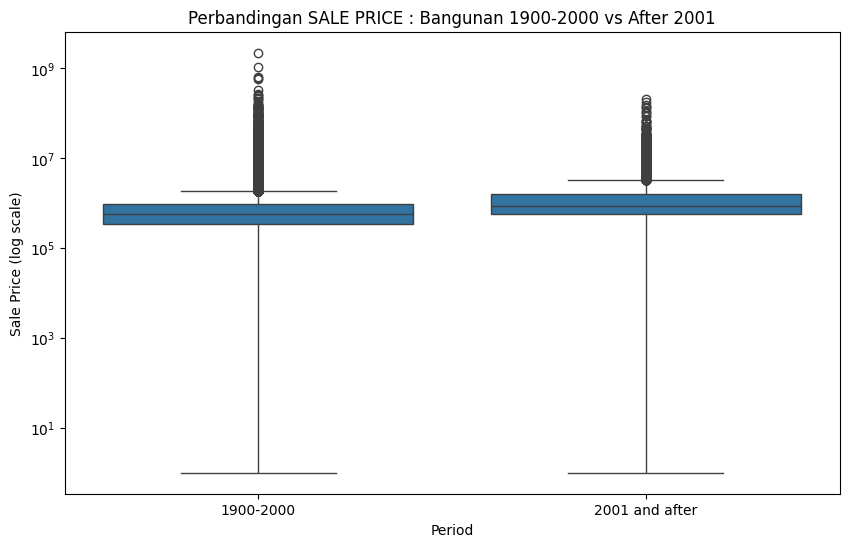

In [25]:
# Buat perbandingan 2 grup menggunakan Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Period', y='SALE PRICE', data=combined_df)
plt.title('Perbandingan SALE PRICE : Bangunan 1900-2000 vs After 2001')
plt.yscale('log')  # Using log scale to handle wide range of prices
plt.ylabel('Sale Price (log scale)')
plt.show()

1. Kedua kelompok memiliki rentang harga yang serupa, namun properti yang dibangun antara tahun 1900-2000 cenderung memiliki lebih banyak outliers dengan harga yang jauh lebih tinggi dibanding "2001 and after"

2. Median harga antara kedua kelompok terlihat mirip, namun distribusi harga properti antara tahun 1900-2000 tampak sedikit lebih lebar

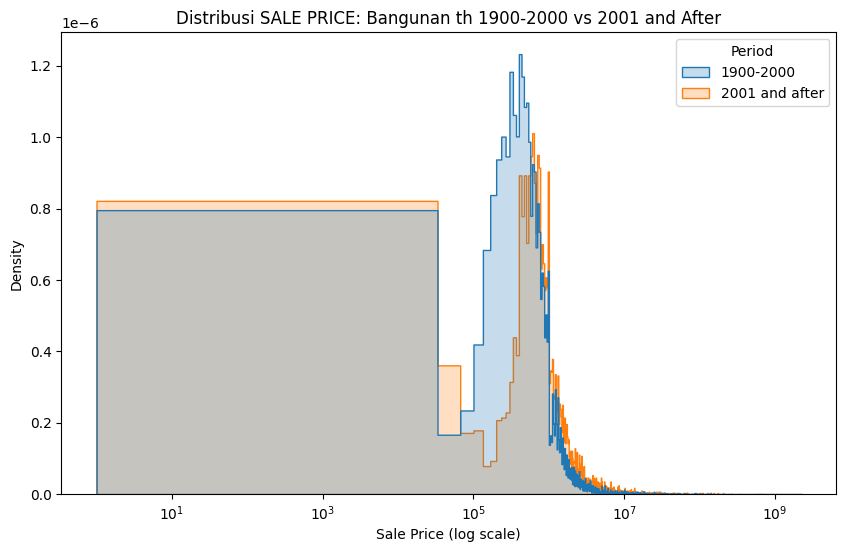

In [30]:
# Histogram persebaran data SALE PRICE
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='SALE PRICE', hue='Period', element="step", stat="density", common_norm=False)
plt.title('Distribusi SALE PRICE: Bangunan th 1900-2000 vs 2001 and After')
plt.xscale('log')  # ubah X menjadi log, supaya outlier tidak dominasi plot nya
plt.xlabel('Sale Price (log scale)')
plt.ylabel('Density')
plt.show()

#### KESIMPULAN GRAFIK
1. Properti yang dibangun antara tahun 1900-2000 memiliki variasi harga yang lebih besar, termasuk properti dengan harga yang sangat tinggi, yang terlihat dari ekor distribusi yang panjang

2. Properti yang dibangun setelah 2001 cenderung memiliki distribusi harga yang lebih terpusat di kisaran harga menengah, dan lebih sedikit properti dengan harga yang sangat tinggi

In [31]:
#pakai t_test untuk mencari perbedaan signifikan dalam 2 grup
sale_price_1900_2000 = group_1900_2000['SALE PRICE']
sale_price_2001_after = group_2001_after['SALE PRICE']

In [42]:
# t-test
t_stat, p_value = ttest_ind(sale_price_1900_2000, sale_price_2001_after, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -6.788042213163689, P-value: 1.1605972746394967e-11


### Pengertian dari t-test di atas
- Nilai t-test : -6.788 menunjukkan bahwa ada perbedaan yang cukup besar antara rata-rata harga properti yang dibangun antara 1900-2000 dan setelah 2001. Nilai negatif menunjukkan bahwa rata-rata harga dari kelompok pertama (1900-2000) lebih rendah daripada kelompok kedua (setelah 2001)

- P-value ini sangat kecil (lebih kecil dari 0.05), yang berarti bahwa ada perbedaan signifikan secara statistik antara rata-rata harga properti kedua kelompok.

- P-value yang kecil menunjukkan bahwa kemungkinan besar perbedaan yang diamati tidak terjadi secara kebetulan, melainkan benar-benar ada perbedaan antara kedua kelompok.

In [33]:
# function untuk hitung confidence interval
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)  # t critical value
    margin_of_error = t_critical * std_err
    return mean, mean - margin_of_error, mean + margin_of_error

# CI untuk bangunan 1900 - 2000
mean_1900_2000, ci_lower_1900_2000, ci_upper_1900_2000 = confidence_interval(sale_price_1900_2000)

# # CI untuk bangunan > 2001
mean_2001_after, ci_lower_2001_after, ci_upper_2001_after = confidence_interval(sale_price_2001_after)

print(f"Properties built between 1900-2000: Mean = {mean_1900_2000}, 95% CI = [{ci_lower_1900_2000}, {ci_upper_1900_2000}]")
print(f"Properties built after 2001: Mean = {mean_2001_after}, 95% CI = [{ci_lower_2001_after}, {ci_upper_2001_after}]")


Properties built between 1900-2000: Mean = 1372101.9479562894, 95% CI = [1246921.73321009, 1497282.1627024887]
Properties built after 2001: Mean = 2000777.3510587676, 95% CI = [1869300.8226224298, 2132253.8794951057]


### Properti yang dibangun antara 1900-2000:

- Rata-rata harga adalah sekitar 1,183,630.84.
- Dengan tingkat kepercayaan 95%, rata-rata harga sebenarnya diperkirakan berada dalam rentang 1,075,570.62 hingga 1,291,691.05.

### Properti yang dibangun setelah 2001:

- Rata-rata harga adalah sekitar 1,730,657.99.
- Dengan tingkat kepercayaan 95%, rata-rata harga sebenarnya diperkirakan berada dalam rentang 1,616,125.00 hingga 1,845,191.00.

### KESIMPULAN

- Properti yang dibangun setelah tahun 2001 memiliki rata-rata harga yang lebih tinggi dibandingkan dengan properti yang dibangun antara 1900-2000

- Karena interval kepercayaan kedua kelompok tidak tumpang tindih, ini memperkuat temuan bahwa ada perbedaan yang signifikan antara harga kedua kelompok properti.

In [34]:
# Tarik Kesimpulan
if p_value < 0.05:
    print("terdapat perbedaan harga jual yang signifikan secara statistik antara properti yang dibangun antara tahun 1900-2000 dan yang dibangun setelah tahun 2001.")
else:
    print("Tidak ada perbedaan harga jual yang signifikan secara statistik antara kedua kelompok.")

terdapat perbedaan harga jual yang signifikan secara statistik antara properti yang dibangun antara tahun 1900-2000 dan yang dibangun setelah tahun 2001.
